In [1]:
import pandas as pd 
import numpy as np


In [2]:
dataset = pd.read_csv('data/cardio_dataset.csv').values


In [3]:
data = dataset[: , : 7]
target = dataset[:,7]

In [4]:
from sklearn.preprocessing import MinMaxScaler
target = np.reshape(target,(-1,1))

scaler_data = MinMaxScaler(feature_range=(0,1))
scaler_target = MinMaxScaler()

data_scaled = scaler_data.fit_transform(data)
target_scaled = scaler_target.fit_transform(target)



In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data_scaled,target_scaled,test_size=0.2)


In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import numpy as np

model = Sequential()
model.add(Dense(128,input_dim=7, activation ="sigmoid",kernel_initializer='normal'))
model.add(Dropout(0.5)) #reduse over fitting
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5)) 
model.add(Dense(10, activation='sigmoid'))

model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,941
Trainable params: 9,941
Non-trainabl

In [7]:
from sklearn.metrics import r2_score
import keras

class CustomCallback(keras.callbacks.Callback):
    
    def on_epoch_end(self,epoch,logs=None):
        predicted_result = model.predict(test_data)
        r2= r2_score(test_target,predicted_result)
        print('epoch',epoch,'-r2 score: ',r2)
    
    


In [8]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('models/model-{epoch:03}.model',moniter='val_loss',save_best_only=True,mode='auto')

In [9]:
history=model.fit(train_data,train_target,epochs=200,validation_data=(test_data,test_target),callbacks=[checkpoint,CustomCallback()])

Epoch 1/200
42/42 [==============================] - 0s 3ms/step
epoch 0 -r2 score:  0.01024601907359679
167/167 [==============================] - 7s 32ms/step - loss: 0.0286 - mse: 0.0286 - mae: 0.1299 - val_loss: 0.0231 - val_mse: 0.0231 - val_mae: 0.1086
Epoch 2/200
42/42 [==============================] - 0s 2ms/step
epoch 1 -r2 score:  0.050439523926580576
167/167 [==============================] - 4s 23ms/step - loss: 0.0235 - mse: 0.0235 - mae: 0.1170 - val_loss: 0.0222 - val_mse: 0.0222 - val_mae: 0.1131
Epoch 3/200
42/42 [==============================] - 0s 2ms/step
epoch 2 -r2 score:  0.12386011085469084
167/167 [==============================] - 4s 24ms/step - loss: 0.0224 - mse: 0.0224 - mae: 0.1151 - val_loss: 0.0205 - val_mse: 0.0205 - val_mae: 0.1080
Epoch 4/200
42/42 [==============================] - 0s 3ms/step
epoch 3 -r2 score:  0.3912337527359747
167/167 [==============================] - 5s 30ms/step - loss: 0.0192 - mse: 0.0192 - mae: 0.1042 - val_loss: 0.0142 

Epoch 22/200
42/42 [==============================] - 0s 4ms/step loss: 0.0060 - mse: 0.0060 - mae: 
epoch 21 -r2 score:  0.8109588787639029
167/167 [==============================] - 2s 12ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0526 - val_loss: 0.0044 - val_mse: 0.0044 - val_mae: 0.0447
Epoch 23/200
42/42 [==============================] - 0s 3ms/step loss: 0.0062 - mse: 0.0062 - mae: 
epoch 22 -r2 score:  0.8034936033970621
167/167 [==============================] - 1s 9ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0528 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0401
Epoch 24/200
42/42 [==============================] - 0s 2ms/step
epoch 23 -r2 score:  0.8172325159279447
167/167 [==============================] - 5s 32ms/step - loss: 0.0057 - mse: 0.0057 - mae: 0.0505 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0391
Epoch 25/200
42/42 [==============================] - 0s 2ms/step loss: 0.0058 - mse: 0.0058 - mae: 0.
epoch 24 -r2 score:  0.8005567500028257
167/167 

Epoch 48/200
42/42 [==============================] - 0s 4ms/step loss: 0.0050 - mse: 0.0050 - mae: 
epoch 47 -r2 score:  0.8210391345161772
167/167 [==============================] - 1s 7ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0464 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0405
Epoch 49/200
42/42 [==============================] - 0s 4ms/step loss: 0.0050 - mse: 0.0050 - mae
epoch 48 -r2 score:  0.8257842241384062
167/167 [==============================] - 1s 9ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0464 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0396
Epoch 50/200
42/42 [==============================] - 0s 4ms/step loss: 0.0048 - mse: 0.0048 - mae: 0
epoch 49 -r2 score:  0.8279131590794466
167/167 [==============================] - 2s 11ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0453 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0380
Epoch 51/200
42/42 [==============================] - 0s 2ms/step
epoch 50 -r2 score:  0.8324552835120876
167/167 [===

Epoch 75/200
42/42 [==============================] - 0s 2ms/step loss: 0.0045 - mse: 0.0045 - mae: 0.
epoch 74 -r2 score:  0.8280018591334899
167/167 [==============================] - 1s 7ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0434 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0382
Epoch 76/200
42/42 [==============================] - 0s 3ms/step
epoch 75 -r2 score:  0.8378671156958449
167/167 [==============================] - 6s 36ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0435 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0364
Epoch 77/200
42/42 [==============================] - 0s 3ms/step loss: 0.0045 - mse: 0.0045 - mae: 
epoch 76 -r2 score:  0.8268539584129901
167/167 [==============================] - 1s 8ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0441 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0375
Epoch 78/200
42/42 [==============================] - 0s 2ms/step loss: 0.0044 - mse: 0.0044 - mae: 0.
epoch 77 -r2 score:  0.8327570737920114
167/167

Epoch 102/200
42/42 [==============================] - 0s 3ms/step loss: 0.0044 - mse: 0.0044 - mae: 
epoch 101 -r2 score:  0.8324499510552175
167/167 [==============================] - 1s 6ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0423 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0373
Epoch 103/200
42/42 [==============================] - 0s 2ms/step loss: 0.0042 - mse: 0.0042 - mae: 0.
epoch 102 -r2 score:  0.8285359592060961
167/167 [==============================] - 1s 8ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0415 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0424
Epoch 104/200
42/42 [==============================] - 0s 3ms/step loss: 0.0043 - mse: 0.0043 - mae: 
epoch 103 -r2 score:  0.8333544272466942
167/167 [==============================] - 2s 9ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0416 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0371
Epoch 105/200
42/42 [==============================] - 0s 3ms/step loss: 0.0042 - mse: 0.0042 - mae: 
epoch 10

Epoch 129/200
42/42 [==============================] - 0s 2ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.
epoch 128 -r2 score:  0.841080397144006
167/167 [==============================] - 1s 6ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0414 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0364
Epoch 130/200
42/42 [==============================] - 0s 2ms/step loss: 0.0040 - mse: 0.0040 - mae: 0.
epoch 129 -r2 score:  0.8405032575138811
167/167 [==============================] - 1s 6ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0409 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0362
Epoch 131/200
42/42 [==============================] - 0s 2ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.
epoch 130 -r2 score:  0.8402206453668666
167/167 [==============================] - 1s 6ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0413 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0364
Epoch 132/200
42/42 [==============================] - 0s 2ms/step loss: 0.0042 - mse: 0.0042 - mae: 0.
epo

42/42 [==============================] - 0s 2ms/step loss: 0.0039 - mse: 0.0039 - mae: 0.
epoch 154 -r2 score:  0.8411565250195107
167/167 [==============================] - 1s 6ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0401 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0370
Epoch 156/200
42/42 [==============================] - 0s 2ms/step loss: 0.0040 - mse: 0.0040 - mae: 0.
epoch 155 -r2 score:  0.8349177660805303
167/167 [==============================] - 1s 6ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0410 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0378
Epoch 157/200
42/42 [==============================] - 0s 3ms/step loss: 0.0041 - mse: 0.0041 - mae: 
epoch 156 -r2 score:  0.840740379757277
167/167 [==============================] - 1s 7ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0413 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0356
Epoch 158/200
42/42 [==============================] - 0s 3ms/step loss: 0.0039 - mse: 0.0039 - mae: 
epoch 157 -r2 score: 

Epoch 182/200
42/42 [==============================] - 0s 3ms/step loss: 0.0038 - mse: 0.0038 - mae: 
epoch 181 -r2 score:  0.8337793549141193
167/167 [==============================] - 1s 9ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0393 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0417
Epoch 183/200
42/42 [==============================] - 0s 2ms/step loss: 0.0039 - mse: 0.0039 - mae: 0.
epoch 182 -r2 score:  0.8411274077136157
167/167 [==============================] - 1s 8ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0402 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0375
Epoch 184/200
42/42 [==============================] - 0s 3ms/step loss: 0.0040 - mse: 0.0040 - mae: 
epoch 183 -r2 score:  0.8404949050788205
167/167 [==============================] - 1s 8ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0404 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0364
Epoch 185/200
42/42 [==============================] - 0s 3ms/step
epoch 184 -r2 score:  0.8455596109610802
16

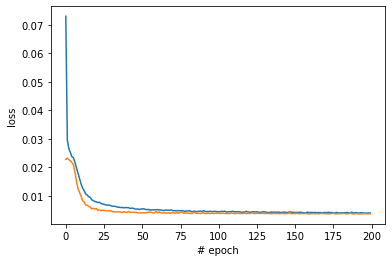

In [10]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='val_loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.show()

In [11]:
predicted_result = model.predict(test_data)
print('actual: ',test_target[:10].T)
print('predicted:', predicted_result[:10].T)

42/42 [==============================] - 0s 2ms/step
actual:  [[0.00234467 0.35638921 0.33294256 0.35990621 0.00586166 0.47127784
  0.02344666 0.25556858 0.09730363 0.40679953]]
predicted: [[-1.7123260e-03  5.2618599e-01  5.2187645e-01  3.7767318e-01
   1.6196817e-04  5.5882871e-01  3.9415926e-02  3.0719826e-01
   1.1362235e-01  5.0254476e-01]]


In [12]:
print('actual inverse scaled:',scaler_target.inverse_transform(test_target[:10]).T)
print('predicted inverse scaled:',scaler_target.inverse_transform(predicted_result[:10]).T)

actual inverse scaled: [[ 0.3 30.5 28.5 30.8  0.6 40.3  2.1 21.9  8.4 34.8]]
predicted inverse scaled: [[-4.6061404e-02  4.4983662e+01  4.4616058e+01  3.2315521e+01
   1.1381588e-01  4.7768085e+01  3.4621785e+00  2.6304012e+01
   9.7919865e+00  4.2967064e+01]]


In [13]:
import joblib

joblib.dump(scaler_data,'scaler_data.sav')
joblib.dump(scaler_target,'scaler_target.sav')

['scaler_target.sav']